In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
deliveries_df = pd.read_csv('/content/drive/MyDrive/IPL/deliveries.csv')
matches_df = pd.read_csv('/content/drive/MyDrive/IPL/matches.csv')

In [ ]:
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
deliveries_df.isna().sum().sum()

513118

In [ ]:
matches_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
matches_df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches_df.drop(['umpire3'],axis=1,inplace=True)

In [ ]:
matches_df[matches_df.isna().sum()[matches_df.isna().sum()>0].index.tolist()]

,city,winner,player_of_match,umpire1,umpire2
0,Hyderabad,Sunrisers Hyderabad,Yuvraj Singh,AY Dandekar,NJ Llong
1,Pune,Rising Pune Supergiant,SPD Smith,A Nand Kishore,S Ravi
2,Rajkot,Kolkata Knight Riders,CA Lynn,Nitin Menon,CK Nandan
3,Indore,Kings XI Punjab,GJ Maxwell,AK Chaudhary,C Shamshuddin
4,Bangalore,Royal Challengers Bangalore,KM Jadhav,NaN,NaN
...,...,...,...,...,...
751,Mumbai,Mumbai Indians,HH Pandya,Nanda Kishore,O Nandan
752,Chennai,Mumbai Indians,AS Yadav,Nigel Llong,Nitin Menon
753,Visakhapatnam,Delhi Capitals,RR Pant,NaN,NaN
754,Visakhapatnam,Chennai Super Kings,F du Plessis,Sundaram Ravi,Bruce Oxenford


In [ ]:
'''
Points to be noted:
> The winner is Nan only for those matches when there is draw
> The Player of the match  is Nan only for those matches when there is draw
> City Nan values is Dubai
> Umpire 1 and Umpire 2 are unknown for some matches
'''
matches_df[matches_df.isna().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [ ]:
# Filling Nans with 'Dubai' in 'city' column
matches_df['city'].fillna(value='Dubai',inplace=True)

# Filling Nans with 'No-one' in 'player_of_match' column
matches_df['player_of_match'].fillna(value='No-one',inplace=True)

# Filling Nans with 'Draw' in 'winner' column
matches_df['winner'].fillna(value='Draw',inplace=True)

# Filling Nans of 'umpire1' and 'umpire2' with 'ffill' method
matches_df['umpire1'].fillna(value='Aleem Dar',inplace=True)
matches_df['umpire2'].fillna(value='Aleem Dar',inplace=True)
matches_df.isna().sum().sum()

0

In [ ]:
# List of teams who played frequently in almost all seasons
teams = [
    'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
    'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings','Delhi Capitals'
]

In [ ]:
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['winner'] = matches_df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['winner'] = matches_df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [ ]:
# discarding the matches for the non-frequent teams
x = matches_df['team1'].isin(teams) & matches_df['team2'].isin(teams)
matches_df = matches_df.loc[x[x].index]

x = deliveries_df['match_id'].isin(matches_df['id'].values)
deliveries_df = deliveries_df.loc[x[x].index]

deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [ ]:
# Evaluating the cumulative runs by ball for each inning and match
deliveries_df['runs_cumsum']=deliveries_df.groupby(['match_id','inning']).cumsum()['total_runs'].values.tolist()


<ipython-input-16-66da1b85066f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deliveries_df['runs_cumsum']=deliveries_df.groupby(['match_id','inning']).cumsum()['total_runs'].values.tolist()


In [ ]:
# For each over there is 6 balls, therefore limiting the official ball count per over to 6
deliveries_df.loc[deliveries_df['ball'][deliveries_df['ball']>6].index.tolist(),'ball']  = 6

In [ ]:
# Evaluating the Current run rate
'''
Current Run Rate = (Total Runs) / (Number 0f Overs + (Number of Balls/6))
'''
deliveries_df['curr_run_rate'] =  deliveries_df['runs_cumsum']/((deliveries_df['over']-1)+deliveries_df['ball']/6)


In [ ]:
# total no. of balls Delivered
deliveries_df['total_balls']=(deliveries_df['over']-1)*6 + deliveries_df['ball']

# Total no. of balls left
deliveries_df['balls_left'] = 120 - deliveries_df['total_balls']

# Working out for wickets fall
not_out_ind = deliveries_df[deliveries_df['player_dismissed'].isna()].index.tolist()
out_ind = deliveries_df.loc[~deliveries_df['player_dismissed'].index.isin(not_out_ind),'player_dismissed'].index.tolist()
# for the not out ball index we give it 0 value
deliveries_df.loc[not_out_ind,'wicket_fall'] = 0
# for the out ball index we give it 1 value
deliveries_df.loc[out_ind,'wicket_fall'] = 1
# finally we evaluate the total wickets fell down till ball for eavh innings
deliveries_df['wicket_fall'] = deliveries_df.groupby(['match_id','inning']).cumsum()['wicket_fall'].values.tolist()

deliveries_df.loc[not_out_ind,'player_dismissed'] = 'Not Out'

<ipython-input-19-5f321847a915>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deliveries_df['wicket_fall'] = deliveries_df.groupby(['match_id','inning']).cumsum()['wicket_fall'].values.tolist()


In [ ]:
# Labelling 'Out' and 'Not Out'
x = deliveries_df['player_dismissed'] == 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 0
x = deliveries_df['player_dismissed'] != 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 1

<ipython-input-21-e91a6c9bd125>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = pd.Series(deliveries_df.groupby('batsman').sum()['total_runs']).nlargest(5)


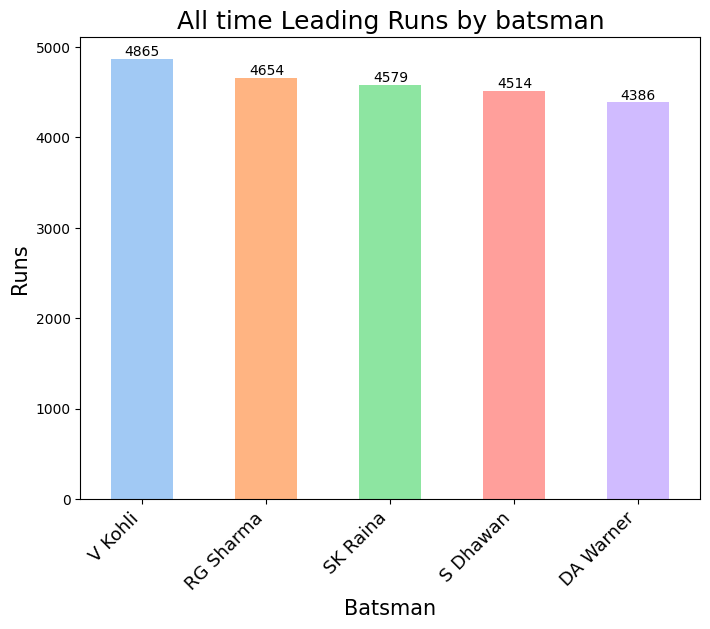

In [ ]:
# All time leading runs scorer
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('batsman').sum()['total_runs']).nlargest(5)
labels = x.values
colors = sns.color_palette('pastel')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Runs by batsman',fontsize=18)
plt.ylabel('Runs',fontsize=15)
plt.xlabel('Batsman',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

<ipython-input-22-9880eacffe70>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = pd.Series(deliveries_df.groupby('bowler').sum()['is_wicket']).nlargest(5)


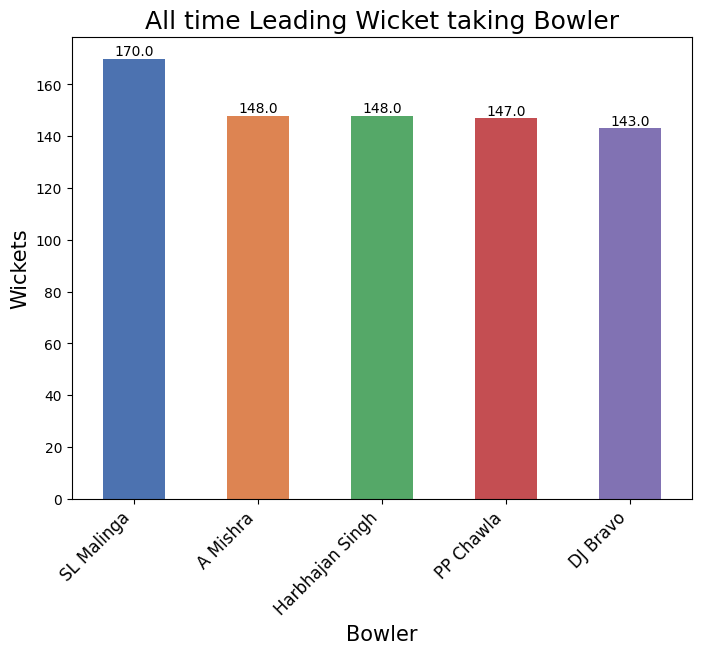

In [ ]:
# All time leading wickets taker
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('bowler').sum()['is_wicket']).nlargest(5)
labels = x.values
colors = sns.color_palette('deep')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Wicket taking Bowler',fontsize=18)
plt.ylabel('Wickets',fontsize=15)
plt.xlabel('Bowler',fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

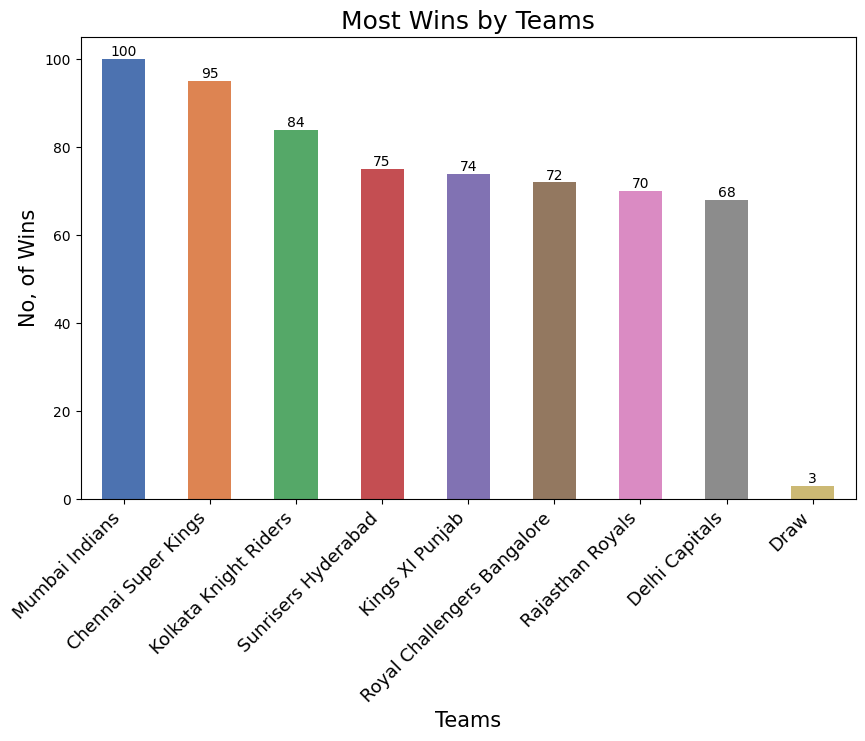

In [ ]:
x = matches_df['winner'].value_counts()
labels= x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize=(10,6))
ax = x.plot(kind='bar',color=colors)
plt.title('Most Wins by Teams',fontsize=18)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('No, of Wins',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

In [ ]:
# Top 'win by runs'
matches_df[['winner','win_by_runs']].nlargest(columns=['win_by_runs'],n=5)

,winner,win_by_runs
43,Mumbai Indians,146
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
706,Sunrisers Hyderabad,118
295,Kings XI Punjab,111


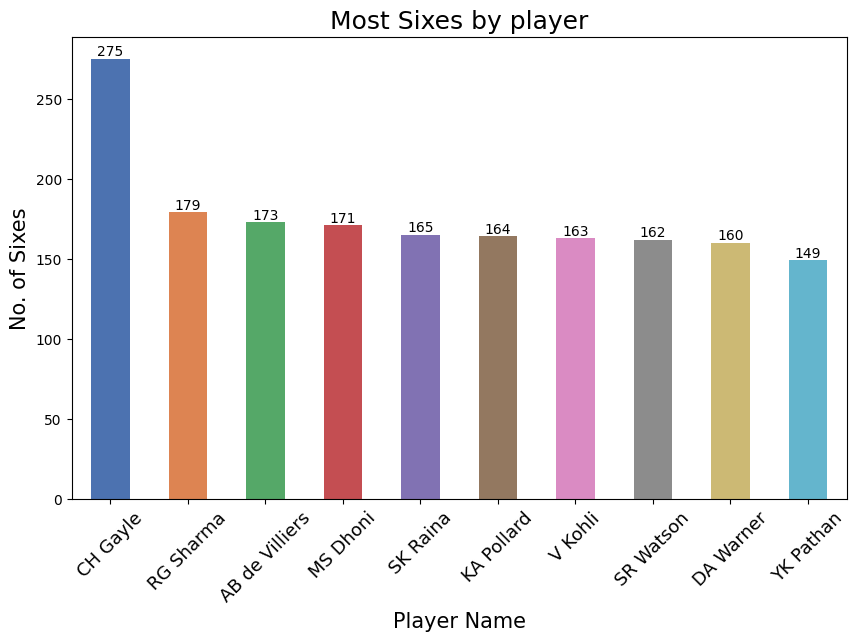

In [ ]:
# Player hitting Most Sixes
x = deliveries_df['total_runs'] == 6
x = pd.Series(deliveries_df.loc[x[x].index,'batsman'].value_counts()).nlargest(10)
labels = x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize = (10,6))
ax = x.plot(kind='bar',color = colors)
plt.title('Most Sixes by player',fontsize=18)
plt.xlabel('Player Name',fontsize=15)
plt.ylabel('No. of Sixes',fontsize=15)
plt.bar_label(ax.containers[0],labels=labels)
plt.xticks(rotation=45,fontsize=13)
plt.show()

#### Now, We prepare a DataFrame to feed in the model fro predictions

In [ ]:
final_df = deliveries_df[['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball','total_runs', 'runs_cumsum', 'curr_run_rate',
       'total_balls', 'balls_left', 'wicket_fall']]

In [ ]:
# Evaluating the target given by the batting team
x = deliveries_df.groupby(['match_id','inning']).sum().reset_index()
target = x[x['inning']==1][['match_id','total_runs']]
final_df = pd.merge(left=final_df,right=target,on='match_id')

<ipython-input-27-7261fb12c343>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = deliveries_df.groupby(['match_id','inning']).sum().reset_index()


In [ ]:
'''
Since, win predictions comes into play only in the second inning
Therefore, we shall consider 2nd innings from now onwards
'''
final_df = final_df[final_df['inning']==2]

In [ ]:
# Evaluating the run left and the wickets left
final_df['runs_left'] = final_df['total_runs_y'] - final_df['runs_cumsum']
final_df['wickets_left'] = 10 - final_df['wicket_fall']

In [ ]:
final_df = final_df.reset_index().drop('index',axis=1)

In [ ]:
'''
For a team scoring more than required the Reqd. runs may become Negative
> To fix it, we adjust the minimum value of runs left to zero
'''
x = final_df['runs_left']<=0
final_df.loc[x[x].index.tolist(),['runs_left']] = 0

In [ ]:
# Evaluating the Required Run Rate (RRR)
final_df['Req_run_rate'] = (final_df['runs_left'] * 6)/(final_df['balls_left'])
'''
Since, for zero runs reqd; balls left can be zero therefore the RRR might become Nans
> To fix this issue we fill the Nans of RRR with the previous observation
'''

final_df.isna().sum()[final_df.isna().sum()>0]

Req_run_rate    39
dtype: int64

In [ ]:
# Filling the Nans created above
final_df['Req_run_rate'].fillna(method='ffill',inplace=True)

In [ ]:
x = final_df['Req_run_rate'] == np.inf
ind = x[x].index.tolist()
for i in ind:
    final_df.loc[i,'Req_run_rate'] = final_df.loc[i - 1,'Req_run_rate']

In [ ]:
# Renaming some columns
final_df.rename(columns={'total_runs_x':'run_scored','total_runs_y':'target'},inplace=True)

In [ ]:
'''
Now, finding our target variable i.e the winner of the match
'''
winner = matches_df[['id','winner']]
final_df = pd.merge(left=final_df,right=winner,right_on='id',left_on='match_id')
final_df.drop('id',axis=1,inplace=True)

In [ ]:
x = final_df['winner'] == 'Draw'
ind = x[x].index.tolist()
final_df.drop(index=ind,axis=0,inplace=True)

In [ ]:
# If the batting wins in second innings, we label it '1'
x = final_df['batting_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 1
# If bowling team wins in second inning, we label it '0'
x = final_df['bowling_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 0

In [ ]:
final_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,run_scored,runs_cumsum,curr_run_rate,total_balls,balls_left,wicket_fall,target,runs_left,wickets_left,Req_run_rate,winner
0,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,1,6.0,1,119,0.0,207,206,10.0,10.386555,0
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,1,3.0,2,118,0.0,207,206,10.0,10.474576,0
2,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,1,2.0,3,117,0.0,207,206,10.0,10.564103,0


In [ ]:
# LabelEncoding the Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['batting_team'] = le.fit_transform(final_df['batting_team'])
final_df['bowling_team'] = le.fit_transform(final_df['bowling_team'])

##### Feature Selection


###### One thing to note while selecting features is that, apart from feature selection based on statistcal values we may select some features which make basic sense and may drop those features which may not be useful in practical life.

In [ ]:
#features = ['batting_team', 'bowling_team','balls_left',  'target', 'runs_left', 'wickets_left']
# We select the 'winner' as the target variable.
Y = final_df['winner']
# Now
X = final_df[[i for i in final_df.columns if i not in  ['winner','match_id','inning']]]

In [ ]:
Y = Y.astype(int)
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 73277 entries, 0 to 73303
Series name: winner
Non-Null Count  Dtype
--------------  -----
73277 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


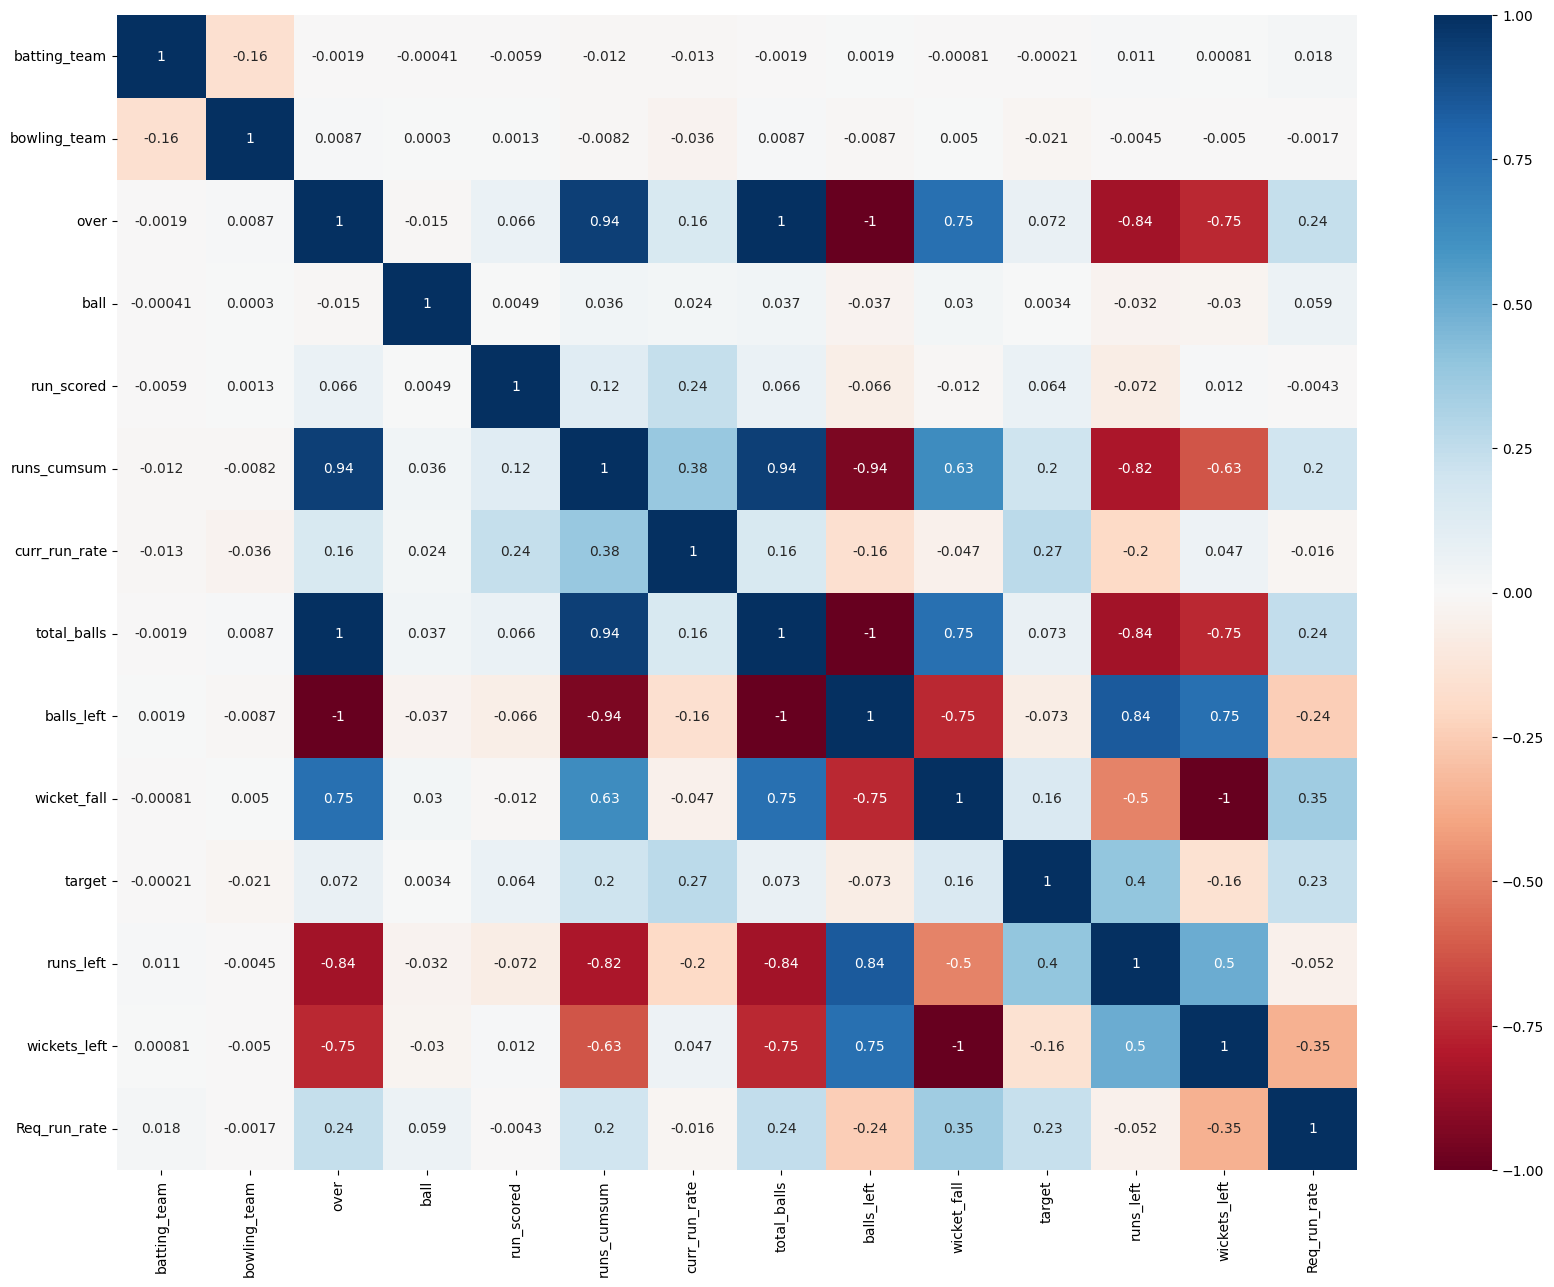

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap( X.corr(),cmap='RdBu',annot=True,center=0)
plt.show()

<b>Based on above corelation matrix we delete the highly corelated features:
    
    'over','runs_cumsum','total_balls','balls_left','wicket_fall'

<br><b>Also, the 'ball' variable defines the n'th ball of the over. Since, it is of no use practically, therefore we drop it.</b>

#### <b>Features finalized</b>:
     'batting_team','bowling_team','run_scored','curr_run_rate','target','wickets_left', 'Req_run_rate','runs_left'

In [ ]:
X = final_df[[ 'batting_team','bowling_team','run_scored','curr_run_rate',
              'target','wickets_left', 'Req_run_rate','runs_left']]

<Axes: >

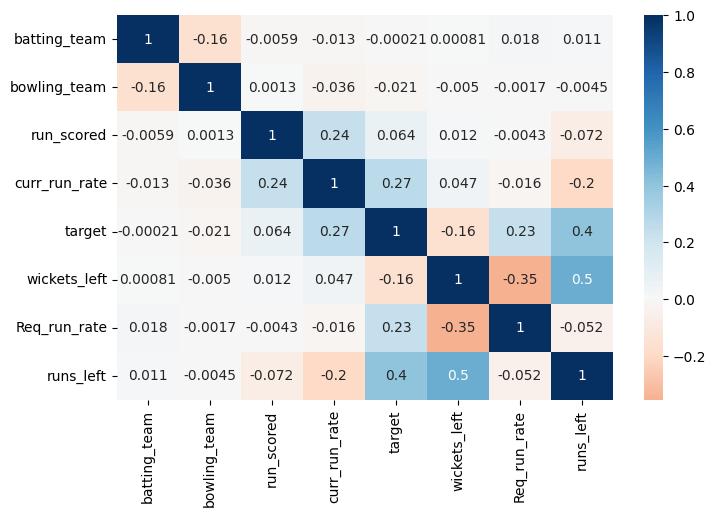

In [ ]:
# Finally we can see that highly corelated variables are dropped
plt.figure(figsize = (8,5))
sns.heatmap(X.corr(),cmap='RdBu',center=0,annot=True)

In [ ]:
# Splitting Data into Training set and Test set
train_X = X.sample(frac=0.9,random_state=0)
train_Y = Y.loc[train_X.index]
test_X = X.drop(train_X.index)
test_Y = Y.drop(train_X.index)

In [ ]:
# Saving the mean and Std. Deviation of each columns for future use
import pickle
scaler_data = pd.DataFrame({'Mean':train_X.mean().values,'SD':train_X.std().values},
                          index=train_X.columns)
pickle.dump(scaler_data,open('scaler_data.pkl','wb'))

In [ ]:
# Scaling the Data for better fit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X),columns=train_X.columns,index=train_X.index)
scaler = StandardScaler()
test_X = pd.DataFrame(scaler.fit_transform(test_X),columns=test_X.columns,index=test_X.index)

In [ ]:
# Fitting the model on K-fold CV for Train set

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=0)
lg = LogisticRegression(random_state=0,max_iter=5000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()


model=[rf,lg,dt,knn]
accuracy_scores = []
mean_acc=[]
std_acc=[]
rmse_scores=[]
mean_rmse=[]
# Perform k-fold cross-validation
for i in model:
    for train_index, test_index in kf.split(train_X):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        Y_train, Y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

        i.fit(X_train, Y_train)
        Y_pred = i.predict(X_test)
        # Calculate and store the accuracy for this fold
        accuracy = accuracy_score(Y_test, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        accuracy_scores.append(accuracy)
        rmse_scores.append(rmse)
    mean_acc.append(np.mean(accuracy_scores))
    mean_rmse.append(np.mean(rmse))

train_model_CV = pd.DataFrame({'RMSE_CV':mean_rmse,'Accuracy_CV':mean_acc},
                              index=['RandomForest','LogisticRegression','DescisionTree','KNN'])

In [ ]:
# Testing the model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

model=[rf,lg,dt,knn]
RMSE=[]
score=[]
acc = []
for i in model:
    Y_predict2 = i.predict(test_X)
    RMSE.append(np.sqrt(mean_squared_error(test_Y,Y_predict2)))
    score.append(i.score(test_X,test_Y))

test_model = pd.DataFrame({'RMSE_test':RMSE,'Accuracy_test':score},
                          index=['RandomForest','LogisticRegression','DescisionTree','KNN'])

In [ ]:
# Model Comparision Between Train Models and Test Models
model_metrics = train_model_CV.join(test_model)
model_metrics

,RMSE_CV,Accuracy_CV,RMSE_test,Accuracy_test
RandomForest,0.094988,0.991842,0.127433,0.983761
LogisticRegression,0.481912,0.882932,0.475376,0.774017
DescisionTree,0.149303,0.913706,0.217607,0.952647
KNN,0.273421,0.917205,0.279874,0.921670


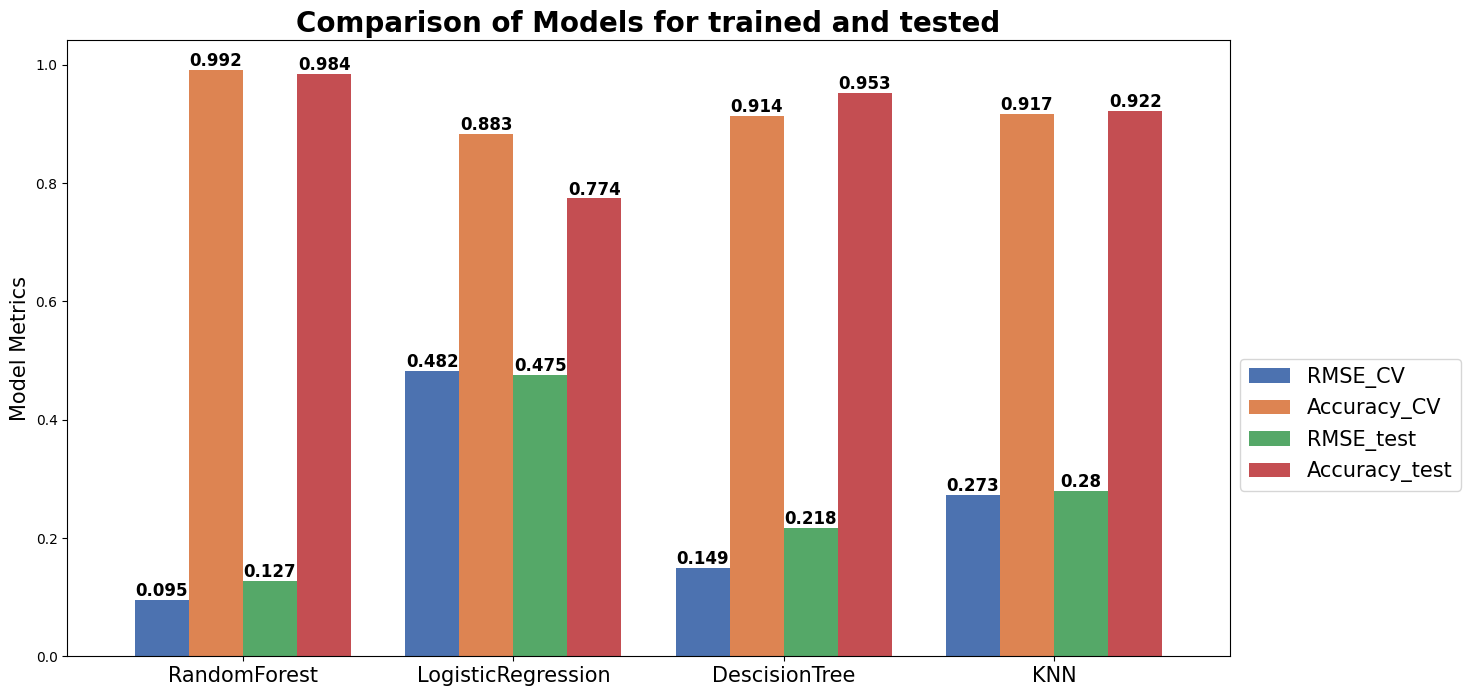

In [ ]:
import matplotlib.pyplot as plt
colors = sns.color_palette(palette='deep')
ax = model_metrics.plot(kind='bar', figsize=(15, 8), color=colors, width=0.8)
plt.title('Comparison of Models for trained and tested', fontsize=20, fontweight='bold')
plt.ylabel('Model Metrics', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', fontsize=15)
for container in ax.containers:
    ax.bar_label(container, labels=[round(h,3) for h in container.datavalues],
                 label_type='edge', fontsize=12,fontweight='bold')
plt.show()


We may try once for the ANN Model also, as it may give low error value for increased accuracy

Epoch 1/100
1855/1855 [==============================] - 13s 5ms/step - loss: 0.4511 - accuracy: 0.7752 - val_loss: 0.4227 - val_accuracy: 0.7900
Epoch 2/100
1855/1855 [==============================] - 9s 5ms/step - loss: 0.4221 - accuracy: 0.7909 - val_loss: 0.4074 - val_accuracy: 0.7998
Epoch 3/100
1855/1855 [==============================] - 9s 5ms/step - loss: 0.3970 - accuracy: 0.8070 - val_loss: 0.3739 - val_accuracy: 0.8183
Epoch 4/100
1855/1855 [==============================] - 8s 4ms/step - loss: 0.3693 - accuracy: 0.8203 - val_loss: 0.3461 - val_accuracy: 0.8341
Epoch 5/100
1855/1855 [==============================] - 9s 5ms/step - loss: 0.3396 - accuracy: 0.8373 - val_loss: 0.3024 - val_accuracy: 0.8582
Epoch 6/100
1855/1855 [==============================] - 8s 5ms/step - loss: 0.3077 - accuracy: 0.8550 - val_loss: 0.2678 - val_accuracy: 0.8693
Epoch 7/100
1855/1855 [==============================] - 8s 4ms/step - loss: 0.2778 - accuracy: 0.8680 - val_loss: 0.2350 - val_a

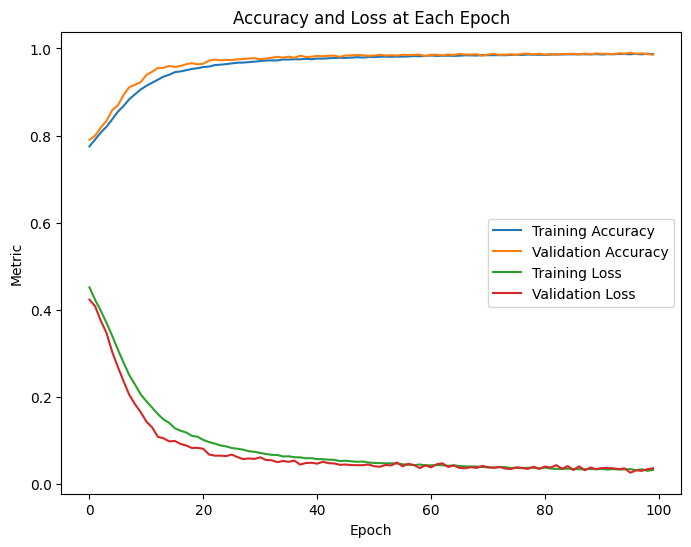

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=2048, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

epochs = 100  # You can adjust the number of epochs based on your dataset and convergence
batch_size = 32  # You can adjust the batch size as well
history = model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Accuracy and Loss at Each Epoch')
plt.legend()
plt.show()

In [ ]:
# Testing the ANN model
Y_predict = model.predict(test_X)
print(np.sqrt(mean_squared_error(test_Y,Y_predict)))
model.evaluate(test_X,test_Y)


229/229 [==============================] - 0s 2ms/step
0.09586534205549593
229/229 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9868


[0.0314541719853878, 0.9867631196975708]

##### HyperParameter Tuning
We did HyperParameter Tuning for the ANN model and we ended up with the above configuration of the model

<br></br>
> ANN Model with 256 as maximum number of nodes<br>
> We see that tere is irregularity in loss and accuracy for test data.
> The model has low steepness, this may take large number of epochs to reach better result.
<br></br>
![ANN Model with 256 as maximum number of nodes](256.png)
<br></br>
> ANN Model with 512 as maximum number of nodes<br>
> Still the problem continues.
<br></br>
![ANN Model with 512 as maximum number of nodes](512.png)

> ANN Model with 1024 as maximum number of nodes<br>
> Still the problem continues.
<br></br>
![ANN Model with 1024 as maximum number of nodes](1024.png)
<br></br>
> ANN Model with 2048 as maximum number of nodes<br>
![ANN Model with 2048 as maximum number of nodes](2048.png)
<br></br>
> ANN Model with 2048 as maximum number of nodes and some Dropouts 0f 0.2<br>
> To overcome overfitting we introduce dropouts.<br>
> This model gives best result and least value of loss.
<br></br>
![ANN Model with 2048 and some Dropouts as maximum number of nodes](2048-0.2.png)
<br></br>
<br></br>
#### We tried with other models also, but the above model gave the most stable values. Therefore, we finalize the above model.<br> Now in comprision to the conventional models such as random forest, logistic regression...etc. the ANN model gives least values of loss and maximum accuracy.



In [ ]:
from keras.models import save_model
save_model(model, 'model_ann2048_dp.h5')